In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import numpy.linalg as la

## Exercise 3.1
### 1.

In [3]:
def eval_lagrange(xeval,xint,yint,N):
    
    lj = np.ones(N+1)
    
    for count in range(N+1):
        for jj in range(N+1):
            if (jj != count):
                lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])
    yeval = 0.
    
    for jj in range(N+1):
        yeval = yeval + yint[jj]*lj[jj]
        
    return(yeval)


    ''' create divided difference matrix'''
def dividedDiffTable(x, y, n):
    
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                    (x[j] - x[i + j]));
    return y;

def evalDDpoly(xval, xint,y,N):
    
    ''' evaluate the polynomial terms'''
    ptmp = np.zeros(N+1)
    
    ptmp[0] = 1.
    
    for j in range(N):
        ptmp[j+1] = ptmp[j]*(xval-xint[j])
        
    '''evaluate the divided difference polynomial'''
    yeval = 0.
    for j in range(N+1):
        yeval = yeval + y[0][j]*ptmp[j]
        
    return yeval

def genVandermonde(x, v, n):
    
    for i in range(n):
        for j in range(n):
            v[j][i] = x[j]**i
    return v


def evalVandpoly(xeval, yint,coefs,N):
    
    '''evaluate polynomial'''
    yeval = 0.
    
    for j in range(N+1):
        yeval += coefs[j]*(xeval**j)
    
    return yeval

### 2.

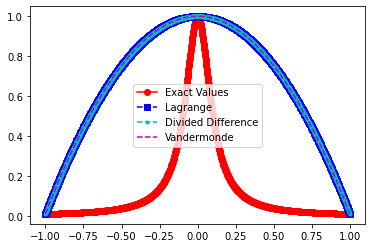

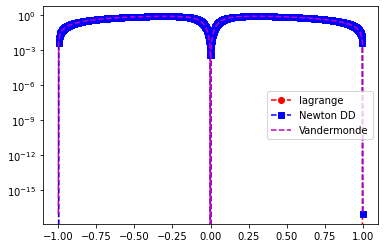

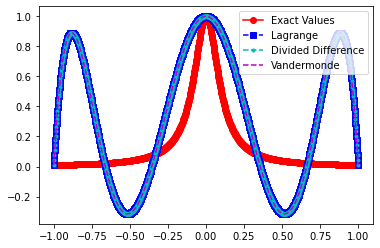

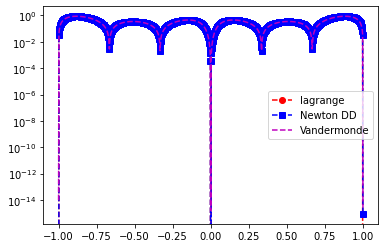

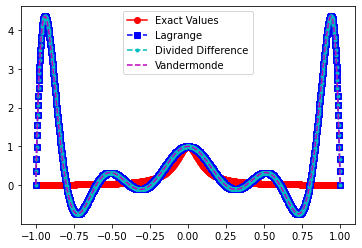

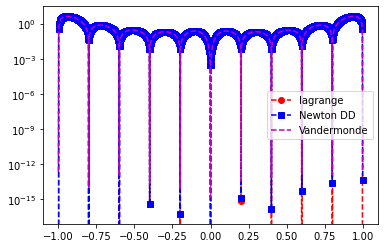

In [19]:
def driver(N):
    
    f = lambda x: 1/(1+(10*x)**2)
    
    ''' interval'''
    a = -1
    b = 1
    
    ''' create equispaced interpolation nodes'''
    xint = np.linspace(a,b,N+1)
    
    ''' create interpolation data'''
    yint = f(xint)
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_l= np.zeros(Neval+1)
    yeval_dd = np.zeros(Neval+1)
    yeval_vand = np.zeros(Neval+1)
    
    '''Initialize and populate the first columns of the
    divided difference matrix. We will pass the x vector'''
    y = np.zeros( (N+1, N+1) )
    
    for j in range(N+1):
        y[j][0] = yint[j]
    
    y = dividedDiffTable(xint, y, N+1)
    
    ''' Vandermonde matrix '''
    v = np.zeros( (N+1, N+1) )
    v = genVandermonde(xint, v, N+1)
    vinv = la.inv(v)
    coefs = vinv.dot(yint)
        
        
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
        yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
        yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
        yeval_vand[kk] = evalVandpoly(xeval[kk], xint,coefs,N)
    
    
    ''' create vector with exact values'''
    fex = f(xeval)
    
    plt.figure()
    plt.plot(xeval,fex,'ro-', label='Exact Values')
    plt.plot(xeval,yeval_l,'bs--', label='Lagrange')
    plt.plot(xeval,yeval_dd,'c.--', label='Divided Difference')
    plt.plot(xeval,yeval_vand,'m--', label='Vandermonde')
    plt.legend()
    
    plt.figure()
    err_l = abs(yeval_l-fex)
    err_dd = abs(yeval_dd-fex)
    err_vand = abs(yeval_vand-fex)
    plt.semilogy(xeval,err_l,'ro--',label='lagrange')
    plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
    plt.semilogy(xeval,err_vand,'m--',label='Vandermonde')
    plt.legend()
    plt.show()
    
driver(2)
driver(6)
driver(10)

All methods perform better with more nodes.  
Now only discussing the results of the last plot with N = 10:  
  
Each of the methods produces the same polynomial, which is expected as since the interpolation polynomial is unique.
Lagrange is performing the best, as it has lower absolute error in between the nodes compared to the other two methods. Newton DD is second best, and Vandermonde has the poorest performance.   
The differences between the methods are only seen in between the nodes, which is expected as the error at the nodes will be zero regardless of the method. The difference is caused by differences in the computations of the method, for example the Vandermond method does so poorly because of the repeated arithmetic and because of uncertainties when inverting the matrix.

### 3.

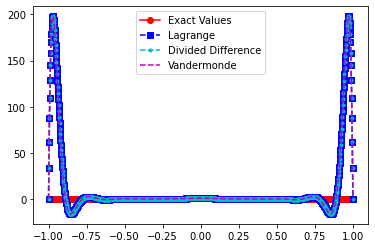

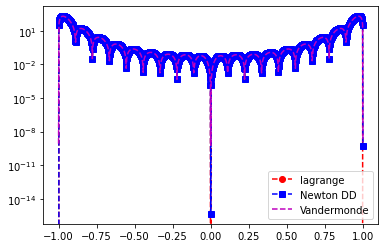

In [18]:
def driver():
    
    f = lambda x: 1/(1+(10*x)**2)
    N = 18
    
    ''' interval'''
    a = -1
    b = 1
    
    ''' create equispaced interpolation nodes'''
    xint = np.linspace(a,b,N+1)
    
    ''' create interpolation data'''
    yint = f(xint)
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_l= np.zeros(Neval+1)
    yeval_dd = np.zeros(Neval+1)
    yeval_vand = np.zeros(Neval+1)
    
    '''Initialize and populate the first columns of the
    divided difference matrix. We will pass the x vector'''
    y = np.zeros( (N+1, N+1) )
    
    for j in range(N+1):
        y[j][0] = yint[j]
    
    y = dividedDiffTable(xint, y, N+1)
    
    ''' Vandermonde matrix '''
    v = np.zeros( (N+1, N+1) )
    v = genVandermonde(xint, v, N+1)
    vinv = la.inv(v)
    coefs = vinv.dot(yint)
        
        
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
        yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
        yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
        yeval_vand[kk] = evalVandpoly(xeval[kk], xint,coefs,N)
    
    
    ''' create vector with exact values'''
    fex = f(xeval)
    
    plt.figure()
    plt.plot(xeval,fex,'ro-', label='Exact Values')
    plt.plot(xeval,yeval_l,'bs--', label='Lagrange')
    plt.plot(xeval,yeval_dd,'c.--', label='Divided Difference')
    plt.plot(xeval,yeval_vand,'m--', label='Vandermonde')
    plt.legend()
    
    plt.figure()
    err_l = abs(yeval_l-fex)
    err_dd = abs(yeval_dd-fex)
    err_vand = abs(yeval_vand-fex)
    plt.semilogy(xeval,err_l,'ro--',label='lagrange')
    plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
    plt.semilogy(xeval,err_vand,'m--',label='Vandermonde')
    plt.legend()
    plt.show()
driver()

The interpolation polynomial is converging to the true values, and the error is decreasing for most points other than the endpoints where the error is the largest. We see the error in the middle of the interval become very small as well.
The differences are only seen where the error is biggest, which again makes sense considering the uniqueness of the interpolation polynomial. The error is being seen because the Runge phenomena, which says that the error will be largest on the end points.

## Exercise 3.2
### 1. 

[ 9.92708874e-01  9.35016243e-01  8.22983866e-01  6.63122658e-01
  4.64723172e-01  2.39315664e-01 -1.60812265e-16 -2.39315664e-01
 -4.64723172e-01 -6.63122658e-01 -8.22983866e-01 -9.35016243e-01
 -9.92708874e-01  2.92000000e+01]


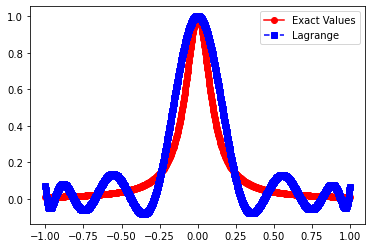

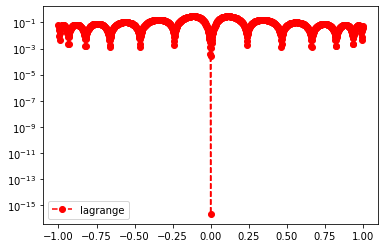

In [6]:
def driver():
    
    f = lambda x: 1/(1+(10*x)**2)
    N = 13
    
    ''' interval'''
    a = -1
    b = 1
    
    ''' create equispaced interpolation nodes'''
    #xint = np.linspace(a,b,N+1)
    xint = np.empty(N+1)
    
    for j in range(1, N+1):
        xint[j-1] = math.cos(((2*j - 1)*np.pi)/(2*N))
    print(xint)
    ''' create interpolation data'''
    yint = f(xint)
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_l= np.zeros(Neval+1)
    #yeval_dd = np.zeros(Neval+1)
    #yeval_vand = np.zeros(Neval+1)
    
    '''Initialize and populate the first columns of the
    divided difference matrix. We will pass the x vector'''
#     y = np.zeros( (N+1, N+1) )
    
#     for j in range(N+1):
#         y[j][0] = yint[j]
    
#     y = dividedDiffTable(xint, y, N+1)
    
#     ''' Vandermonde matrix '''
#     v = np.zeros( (N+1, N+1) )
#     v = genVandermonde(xint, v, N+1)
#     vinv = la.inv(v)
#     coefs = vinv.dot(yint)
        
        
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
        yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
        #yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
        #yeval_vand[kk] = evalVandpoly(xeval[kk], xint,coefs,N)
    
    
    ''' create vector with exact values'''
    fex = f(xeval)
    
    plt.figure()
    plt.plot(xeval,fex,'ro-', label='Exact Values')
    plt.plot(xeval,yeval_l,'bs--', label='Lagrange')
    #plt.plot(xeval,yeval_dd,'c.--', label='Divided Difference')
    #plt.plot(xeval,yeval_vand,'m--', label='Vandermonde')
    plt.legend()
    
    plt.figure()
    err_l = abs(yeval_l-fex)
    #err_dd = abs(yeval_dd-fex)
    #err_vand = abs(yeval_vand-fex)
    plt.semilogy(xeval,err_l,'ro--',label='lagrange')
    #plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
    #plt.semilogy(xeval,err_vand,'m--',label='Vandermonde')
    plt.legend()
    plt.show()
driver()

## 2.
The function is fit more consistently across the interval, the middle stays good but the error at the ends is significantly better.

## 3.
The error is now much lower overall, and the increase at the endpoints is no longer seen. The error in the middle of the interval is still much lower than everywhere else.